In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# A Accuracy of (piecewise) interpolation
## Lagrange interpolation

Implement `lagrangeInterp` which given a function f, an interval [a,b] and the order n > 0 returns the centered coefficients ci of the equidistant Lagrange interpolating polynomial $\Pi_nf$. For the computation of the centered coefficients you may use numpy’s built-in polyfit by subtracting m to the values of the nodes x when calling the function. Verify that the values of the centered coefficients are the same you computed by hand in the tutorial for n = 1 and n = 2.

In [ ]:
def lagrangeInterp(f, interval , n):
    """
    INPUT:
    f         scalar-valued function
    interval  interpolation interval [a,b]
    n         interpolation order

    OUTPUT:
    coeff     centered coefficients of Lagrange interpolant
    """
    m = np.mean(interval)
    x = np.linspace(*interval, n+1)
    y = f(x)
    coeff = np.polyfit(x-m, y, n)

    return coeff


In [ ]:
p = 1
sine = lambda x: np.sin(x/p)

for n in [1,2]:
    testCoeffs = lagrangeInterp(sine,[0, 2*np.pi], n)
    print(f'For n={n} the coefficients in descending order are {testCoeffs}')


For n=1 the coefficients in descending order are [-3.89817183e-17 -1.22464680e-16]
For n=2 the coefficients in descending order are [-2.48165326e-17 -3.89817183e-17  1.22464680e-16]


Consider $f(x) = \sin(x)$ on the interval $[0,2\pi]$. You are given the code of a Python function `evaluateInterpolant` which evaluates a single (or piecewise) Lagrange interpolant.

In [ ]:
## THIS FUNCTION IS GIVEN TO STUDENTS


def evaluateInterpolant(coeffs, intervals, xVals, N):
    # import numpy as np
    fVals = np.zeros((np.size(xVals)))

    if N == 1:
        for i in range(np.size(coeffs)-1):
            m = (intervals[0] + intervals[1])/2
            fVals = np.polyval(coeffs, xVals-m)
    else:
        for k in range(N):
            coeff_int = coeffs[k,:]
            I_int = intervals[k,:]
            x_int = xVals[(I_int[0] <= xVals) & (xVals <= I_int[1])]
            m = (I_int[0] + I_int[1])/2
            y = np.polyval(coeff_int, x_int-m)
            fVals[(I_int[0] <= xVals) & (xVals <= I_int[1])] = y

    return fVals


In a single figure plot the function $f$ and the interpolating polynomials $Π_1f(x),...,Π_4f(x)$ on the given interval. Make a new figure, and using `semilogy` plot the error of the interpolating polynomials $|f(x)−Π_1f(x)|,...,|f(x)−Π_4f(x)|$ as a function of $x$.

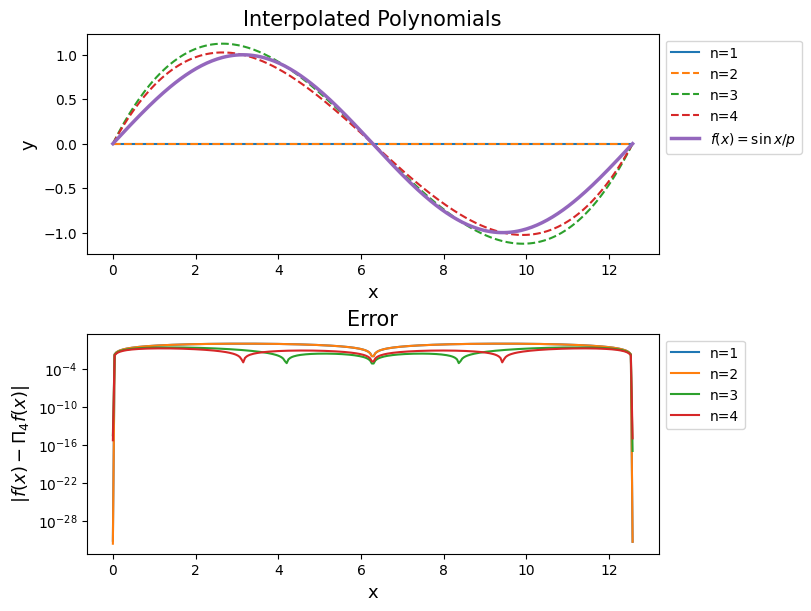

In [ ]:
N = 1
n = [1,2,3,4]
p = 2
intervals = [0, 2*np.pi*p]
xSine = np.linspace(0, 2*np.pi*p, 300)
ySine = sine(xSine)

sine = lambda x: np.sin(x/p)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)

for i in n:
    if i != 1:
        style = 'dashed'
    else:
        style = 'solid'
    #solid line for visibility

    coeffs = lagrangeInterp(sine, intervals, i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)
    ax[0].plot(xSine, yVals, linestyle=style, label=f'n={i}')

    error = abs(ySine - yVals)


    ax[1].semilogy(xSine, error, linestyle='solid', label=f'n={i}')

ax[0].plot(xSine, ySine, label='$f(x) = \sin x/p$', linewidth=2.5)
ax[0].set_xlabel('x', fontsize=13)
ax[0].set_ylabel('y', fontsize=13)
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[0].set_title('Interpolated Polynomials', fontsize=15)

ax[1].set_title('Error', fontsize=15)
ax[1].set_xlabel('x', fontsize=13)
ax[1].set_ylabel('$|f(x)−Π_4f(x)|$', fontsize=13)
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


**Discussion question A.1: (see Tutorial: A.2) For each value of n, at how many points is the error between interpolant and function (very close to) zero in the plots? How can this number of points be explained from the theory?**

The error is close to zero n+1 times for an nth order interpolation. This aligns with the theory if we examine the basis for the polynomials:

$$\Pi_n f(x) = \prod_{j=0 \\ j\neq k}^n \frac{x-x_j}{x_k-x_j}$$

There polynomials are constructed such that they go through all of the data points they are given to construct them. Since n+1 points are needed to create an nth order interpolation, the number of times the error is zero should also be n+1. Check the answer of A.2

For $Π_1f, . . . , Π_{15}f$ compute the maximum error on the given interval, and plot that maximum error in the y-axis in terms of the polynomial order n in the x-axis using `loglog`. Also include in the plot the right-hand-side of Equation (2).


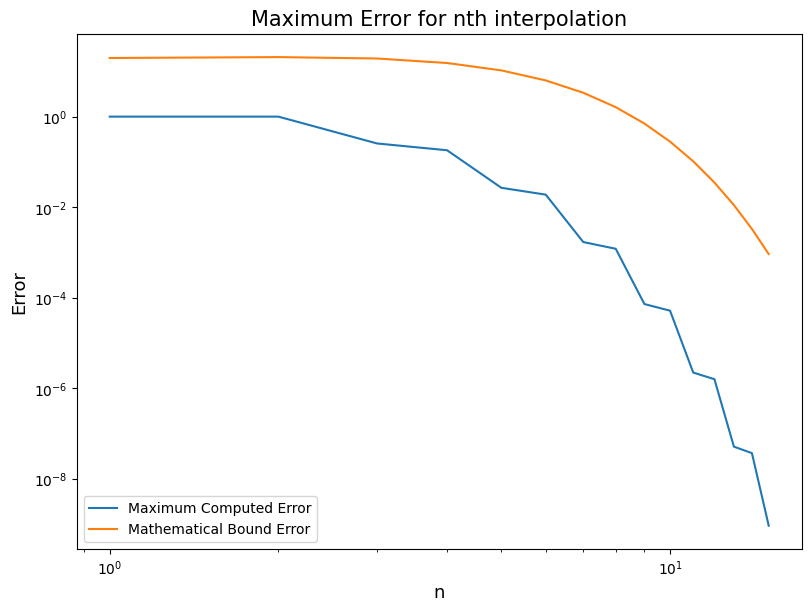

In [ ]:
N = 1
a = 0
b = 2*np.pi*p
n = np.array([i for i in range(1, 16, 1)])
intervals = [a, b]

xSine = np.linspace(0, 2*np.pi, 100)
ySine = sine(xSine)


fig = plt.figure(figsize=(8, 6), constrained_layout=True)

errors = []

boundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1)

for i in n:
    coeffs = lagrangeInterp(sine, intervals, i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)

    nError = np.max(abs(ySine - yVals))
    errors.append(nError)

plt.loglog(n, errors, label='Maximum Computed Error')

yBound = boundError(n, N)

plt.loglog(n, yBound, label='Mathematical Bound Error')


plt.title('Maximum Error for nth interpolation', fontsize=15)
plt.xlabel('n', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.legend()

plt.show()


**Discussion question A.2: (Tutorial: A.4) Which of both curves (true error and right-hand-side of Equation (2)) is larger? How can this be explained from the theory?**



Because in the proof W_n+1 is changed into < or = to f^(n+1)

## Piecewise Lagrange interpolation

Implement a Python function `piecewiseInterp` which given a function f, an interval [a,b], a specified polynomial order n and the number of subintervals N computes the centered coefficients (centered per subinterval) of the piecewise Lagrange interpolant $\Pi_n^Nf$, together with the corresponding subintervals. For N = 1 the coefficient output should be equivalent to that of `lagrangeInterp`

In [ ]:
def piecewiseInterp(f, interval, n, N):
    """
    INPUT:
    f             f scalar-valued function
    interval      interpolation interval [a, b]
    n             interpolation order
    N             number of subintervals

    OUTPUT:
    coeffs        i-th row are centered coefficients of i-th subinterval
    intervals     i-th row are begin and endpoint of i-th subinterval
    """
    s = ( interval[1] - interval[0] ) / N
    #separation of the subintervals

    ext = [( interval[0] + s*i ) for i in range(N+1)]
    #subintervals positions in x axis
    intervals = [[ext[n], ext[n+1]] for n in range(N)]
    #intervals in each subinterval

    coeffs = []

    for i in intervals:
        coN = lagrangeInterp(f, i, n)
        coeffs.append(coN)

    return np.array(intervals), np.array(coeffs)


# Test run
ints, coeffs = piecewiseInterp(sine, [0, 2*np.pi], 2, 2)

print(ints)
print(coeffs)


[[0.         3.14159265]
 [3.14159265 6.28318531]]
[[-4.05284735e-01  0.00000000e+00  1.00000000e+00]
 [ 4.05284735e-01 -9.99551904e-17 -1.00000000e+00]]


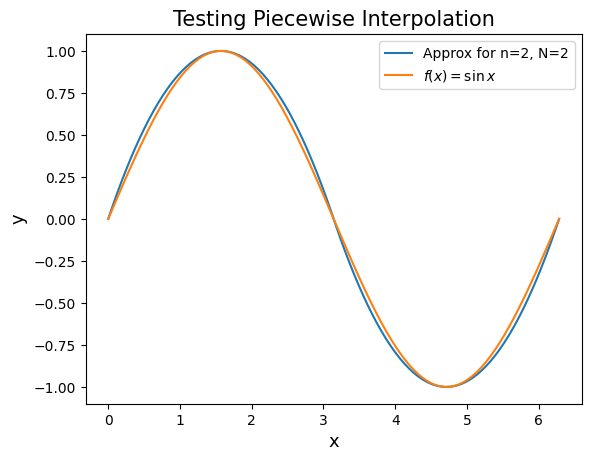

In [ ]:
# Testing the function
N = 2
n = 2
a = 0
b = 2*np.pi
xVals = np.linspace(a,b,100)
ySine = sine(xVals)


intervals, coeffs = piecewiseInterp(sine, [a, b], n, N)
yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

plt.plot(xVals, yPiece, label=f'Approx for n={n}, N={N}')
plt.plot(xVals, ySine, label='$f(x)= \sin x$')

plt.title('Testing Piecewise Interpolation', fontsize=15)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.legend()
plt.show()


Consider $f$ as before. In a single figure, plot the function $f$ and the piecewise Lagrange interpolants of order $1,2,3,4$ using $N = 4$ subintervals. Make another figure with the logarithm of the error as a function of $x$, for the piecewise interpolants with $n = 1, . . . , 4$ at a fixed number of subintervals $N = 4$.

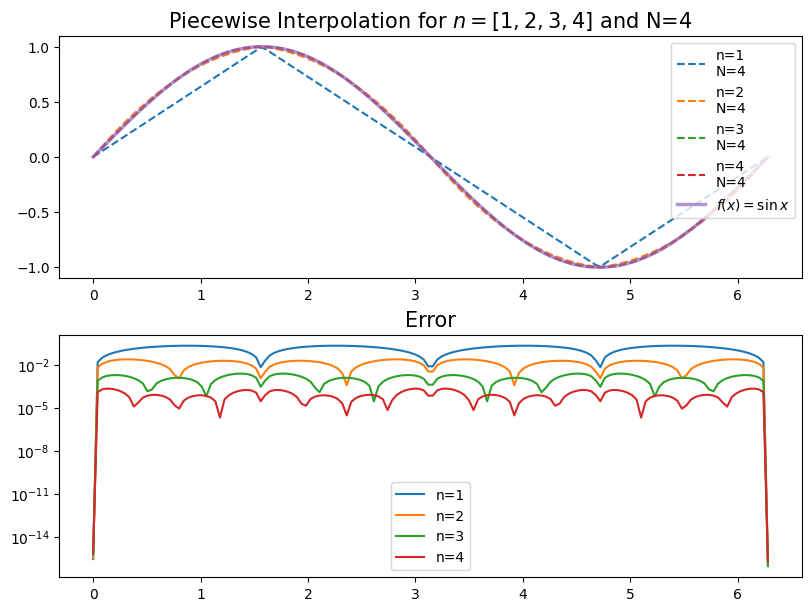

In [ ]:
N = 4
n = [1,2,3,4]
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 150)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)

ySine = sine(xVals)


for j in n:
    intervals, coeffs = piecewiseInterp(sine, [a, b], j, N)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

    ax[0].plot(xVals, yPiece, label=f'n={j}\nN={N}', linestyle='dashed')

    error = abs(ySine - yPiece)

    ax[1].semilogy(xVals, error, linestyle='solid', label=f'n={j}')

ax[0].plot(xVals, ySine, label='$f(x)= \sin x$', linewidth=2.5, alpha=0.7)

ax[0].legend()
ax[1].legend()

ax[0].set_title(f'Piecewise Interpolation for $n={n}$ and N={N}', fontsize=15)
ax[1].set_title(f'Error', fontsize=15)

plt.show()


# Personal Trials

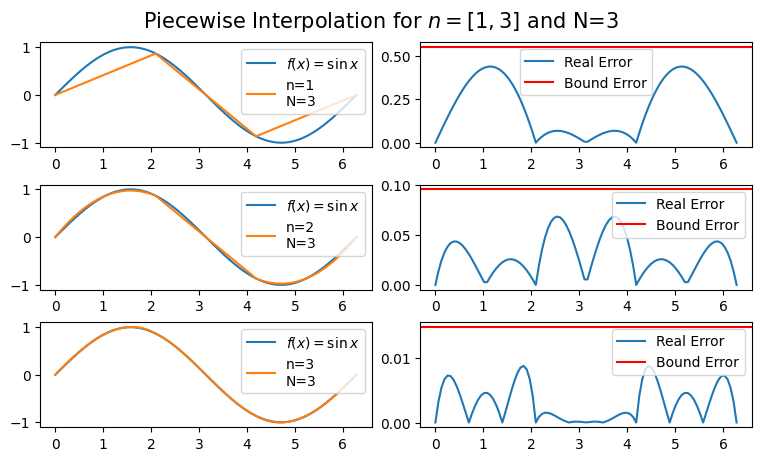

In [ ]:
N = 3 # N >= 2
n = 3 # n > 0 and n != 1 if n = 2
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig, ax = plt.subplots(n, 2,
                       figsize=(2.5*n, 1.5*N),
                       constrained_layout=True)

upperBoundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1)

for i in range(1, n+1):
    intervals, coeffs = piecewiseInterp(sine, [a, b], i, N)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

    ax[i-1,0].plot(xVals, ySine, label='$f(x)= \sin x$')
    ax[i-1,0].plot(xVals, yPiece, label=f'n={i}\nN={N}')
    ax[i-1,0].legend()

    error = abs(ySine - yPiece)
    boundError = np.max(upperBoundError(i,N))

    ax[i-1,1].plot(xVals, error, linestyle='solid', label='Real Error')
    ax[i-1,1].axhline(y=boundError, color='r', linestyle='-', label='Bound Error')
    ax[i-1,1].legend()

fig.suptitle(f'Piecewise Interpolation for $n=[1,{n}]$ and N={N}', fontsize=15)

plt.show()


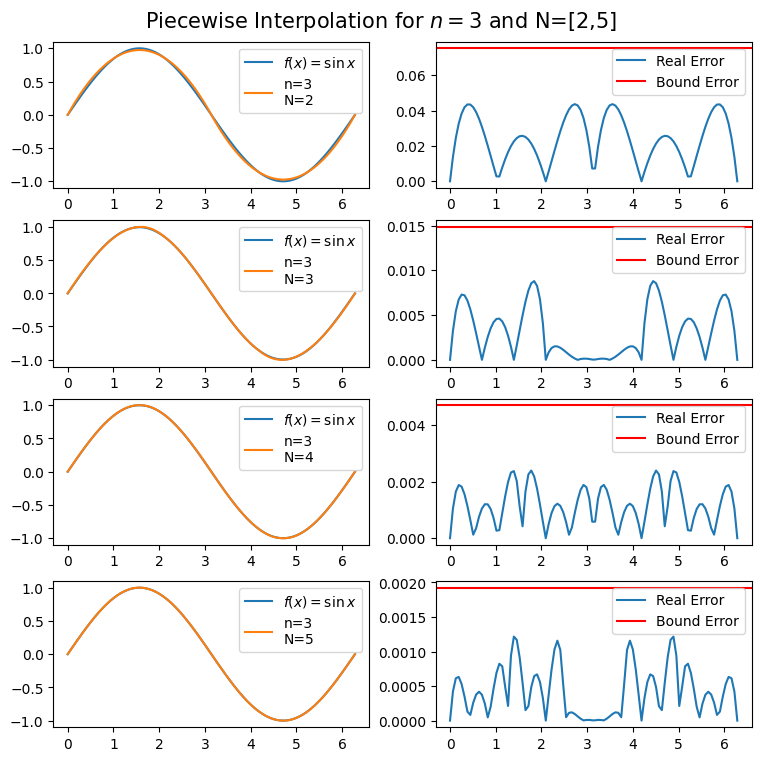

In [ ]:
N = 5 # N >= 2
n = 3 # n > 0 and n != 1 if n = 2
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig, ax = plt.subplots(N-1, 2,
                       figsize=(2.5*n, 1.5*N),
                       constrained_layout=True)


for i in range(2, N+1):
    intervals, coeffs = piecewiseInterp(sine, [a, b], n, i)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

    ax[i-2,0].plot(xVals, ySine, label='$f(x)= \sin x$')
    ax[i-2,0].plot(xVals, yPiece, label=f'n={n}\nN={i}')
    ax[i-2,0].legend()

    error = abs(ySine - yPiece)
    boundError = np.max(upperBoundError(n, i))

    ax[i-2,1].plot(xVals, error, linestyle='solid', label='Real Error')
    ax[i-2,1].axhline(y=boundError, color='r', linestyle='-', label='Bound Error')
    ax[i-2,1].legend()

fig.suptitle(f'Piecewise Interpolation for $n={n}$ and N=[2,{N}]', fontsize=15)

plt.show()


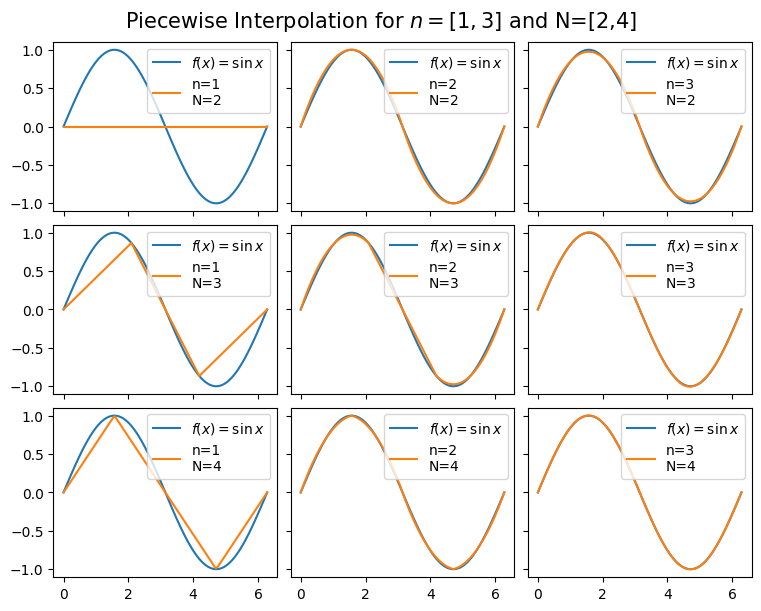

In [ ]:
N = 4 # N >= 2
n = 3 # n > 0 and n != 1 if n = 2
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig, ax = plt.subplots(N-1, n,
                       figsize=(2.5*n, 1.5*N),
                       constrained_layout=True,
                       sharex=True,
                       sharey=True)

for i in range(2, N+1):
    for j in range(1, n+1):
        intervals, coeffs = piecewiseInterp(sine, [a, b], j, i)
        yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

        if n == 1:
            ax[i-2].plot(xVals, ySine, label='$f(x)= \sin x$')
            ax[i-2].plot(xVals, yPiece, label=f'n={j}\nN={i}')
            ax[i-2].legend()

        elif N <= 2:
            ax[j-1].plot(xVals, ySine, label='$f(x)= \sin x$')
            ax[j-1].plot(xVals, yPiece, label=f'n={j}\nN={i}')
            ax[j-1].legend()

        else:
            ax[i-2, j-1].plot(xVals, ySine, label='$f(x)= \sin x$')
            ax[i-2, j-1].plot(xVals, yPiece, label=f'n={j}\nN={i}')
            ax[i-2, j-1].legend()

fig.suptitle(f'Piecewise Interpolation for $n=[1,{n}]$ and N=[2,{N}]', fontsize=15)
plt.show()


# continue...

For each order $n = 1, . . . , 4$ plot the maximum error over the whole interval v.s. the number of subintervals $N = 2^l$, for $l = 0,...,10$ using `loglog`, together with the right-hand side of Equation (3).


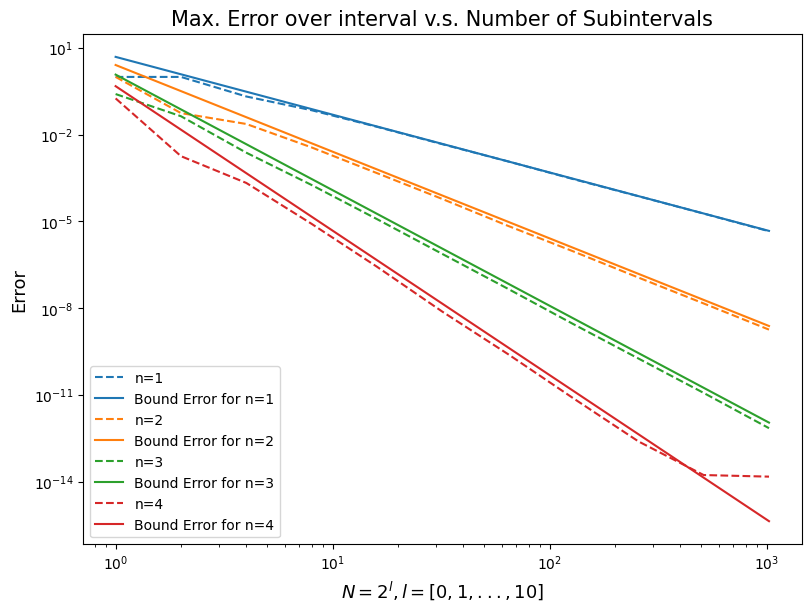

In [ ]:
N = [2**i for i in range(11)] # N >= 2
n = [1,2,3,4]
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

errors = []
boundErrors = []

upperBoundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1)

for i in N:
    for j in n:
        if i == 1:
            intervals, coeffs = piecewiseInterp(sine, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, i)
        else:
            intervals, coeffs = piecewiseInterp(sine, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        boundError = upperBoundError(j,i)
        boundErrors.append(boundError)

        # print(f'N={i}, n={j}, Max.Error={maxError}, Bound.Error={boundError}')


matrix = np.reshape(np.array(errors), (len(N), len(n))).T
# print(matrix)
boundMatrix = np.reshape(np.array(boundErrors), (len(N), len(n))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(n)):
    plt.loglog(N, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')
    plt.loglog(N, boundMatrix[i], label=f'Bound Error for n={i+1}', c=colors[i])


plt.xlabel(f'$N = 2^l, l=[0,1,...,10]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Error over interval v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()


# Comparison
Thus far we have seen two methods for increasing the interpolation accuracy: increasing the order $n$, or increasing the number of subintervals $N$. A fair comparison between those methods considers the maximum error as function of the number of function evaluations needed. In a single figure, using `loglog`, plot the following computed errors v.s. the number of required function evaluations:
- One curve for the maximum (global) Lagrange interpolation error $$\max _{x \in[a, b]}\left|E_n f(x)\right|$$, $x \in [a,b]$ where $n = 1, . . . , 20$ is varied in order to obtain different number of functions evaluations.


In [2]:
a = 0
b = 2*np.pi
interval = [a, b]
xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

evalNum = lambda n: n+1

ns = np.linspace(1,20,20)

x = evalNum(ns)

errors = []


for n in range(1,21):
        null, coeffs = piecewiseInterp(sine, interval, n, 1)
        yPiece = evaluateInterpolant(coeffs[0], interval, xVals, 1)

        maxError = np.max(abs(ySine - yPiece))
        errors.append(maxError)

plt.loglog(x, errors, label='n=1,...,20')

# Piecewise plotting
Ns = [2**i for i in range(11)] # N >= 2
ns = [1,2,3,4]


errors = []
evalTimes = []

pieceFuncEval = lambda n,N: N*(n+1)

for N in Ns:
    for n in ns:
        if N == 1:
            intervals, coeffs = piecewiseInterp(sine, [a, b], n, N)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, N)
        else:
            intervals, coeffs = piecewiseInterp(sine, [a, b], n, N)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, N)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        evalTime = pieceFuncEval(n, N)
        evalTimes.append(evalTime)

        # print(f'N={N}, n={n}, Max.Error={evalTime}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns))).T
evalMat = np.reshape(np.array(evalTimes), (len(Ns), len(ns))).T
# print(evalMat)

for i in range(len(ns)):
    plt.loglog(evalMat[i], matrix[i], linestyle='dashed', label=f'n={i+1}')

plt.xlabel(f'Number of Function Evaluations', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Piecewise Error v.s. Number of Function Evaluations',
          fontsize=15)
plt.legend()

plt.show()


NameError: name 'np' is not defined

# B. Stability of (global and piecewise) interpolation

By re-using code you wrote in Section A, create separate plots with:
- $f(x)$ and $\Pi_nf(x)$ for $n = \{4,20\}$.

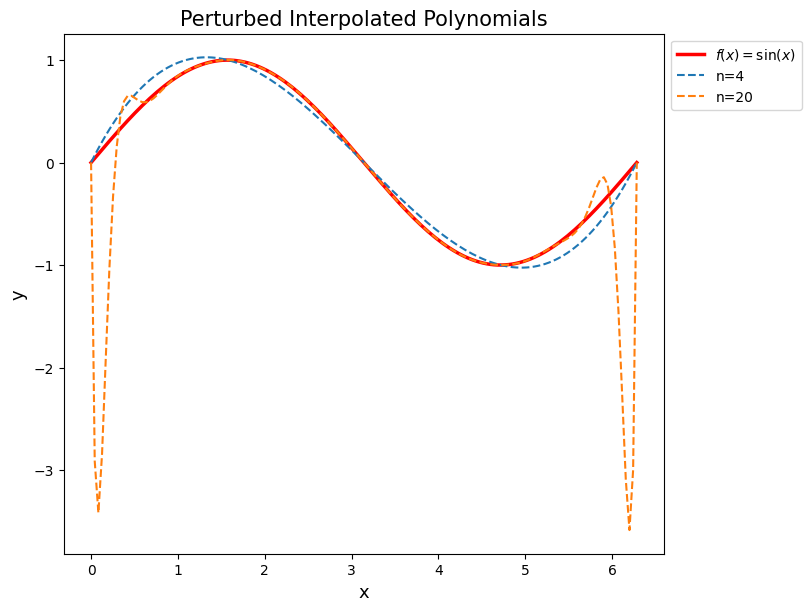

In [ ]:
fHat = lambda x: np.sin(x) + 0.001*np.cos(8*x)

N = 1
n = [4, 20]
intervals = [0, 2*np.pi]


xSine = np.linspace(0, 2*np.pi, 150)
ySine = sine(xSine)
yPerturb = fHat(xSine)


fig = plt.figure(figsize=(8, 6), constrained_layout=True)

plt.plot(xSine, ySine, label='$f(x) = \sin (x)$', linewidth=2.5, c='red')

for i in n:
    coeffs = lagrangeInterp(fHat, [0, 2*np.pi], i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)
    plt.plot(xSine, yVals, linestyle='dashed', label=f'n={i}')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Perturbed Interpolated Polynomials', fontsize=15)

plt.show()


- $f(x)$ and $\Pi_n^N \hat{f}(x)$ for $n=1,~N=\{4,20\}$.


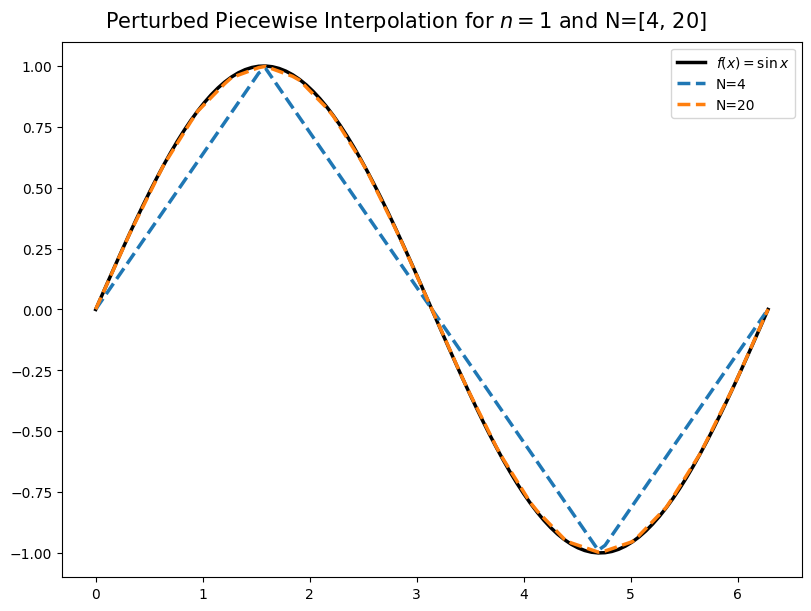

In [ ]:
N = [4, 20] # N >= 2
n = 1
a = 0
b = 2*np.pi

xVals = np.linspace(a, b, 100)
ySine = sine(xVals)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

plt.plot(xVals, ySine, label='$f(x)= \sin x$', linewidth=2.5, c='black')

for i in N:
    intervals, coeffs = piecewiseInterp(fHat, [a, b], n, i)
    yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

    plt.plot(xVals, yPiece, label=f'N={i}', linestyle='dashed', linewidth=2.5)

plt.legend()

fig.suptitle(f'Perturbed Piecewise Interpolation for $n={n}$ and N={N}', fontsize=15)

plt.show()


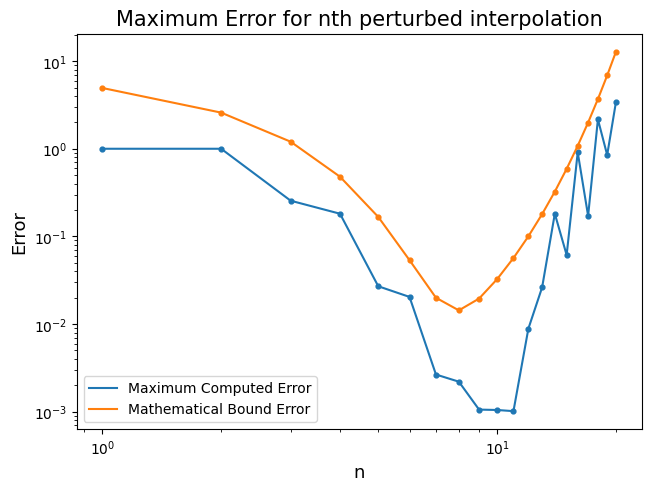

In [ ]:
N = 1
a = 0
b = 2*np.pi
n = np.array([i for i in range(1, 21)])
intervals = [a, b]

xSine = np.linspace(0, 2*np.pi, 100)
ySine = sine(xSine)
yPerturb = fHat(xSine)
eps = yPerturb - ySine

fig = plt.figure(constrained_layout=True)

errors = []

boundError = lambda n,N: 1/( 4*(n+1) ) * ( (b - a) / n )**(n+1) + ( 2**(n+1) )  / ( np.e*n*np.log(n) + 0.5772) * max(eps)


for i in n:
    coeffs = lagrangeInterp(fHat, [0, 2*np.pi], i)
    yVals = evaluateInterpolant(coeffs, intervals, xSine, N)

    nError = np.max(abs(yVals - ySine))
    errors.append(nError)

plt.loglog(n, errors, label='Maximum Computed Error')
plt.scatter(n, errors, s=12)

yBound = boundError(n, N)

plt.loglog(n, yBound, label='Mathematical Bound Error')
plt.scatter(n, yBound, s=12)

plt.title('Maximum Error for nth perturbed interpolation', fontsize=15)
plt.xlabel('n', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.legend(loc='lower left')

plt.show()


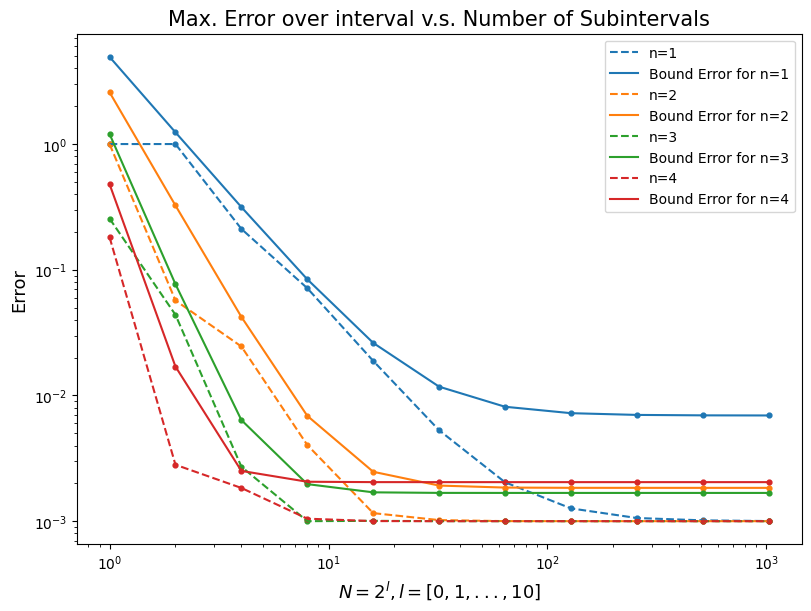

In [ ]:
N = [2**i for i in range(11)]
n = [1,2,3,4]
a = 0
b = 2*np.pi
xVals = np.linspace(a, b, 200)
ySine = sine(xVals)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

errors = []
boundErrors = []

upperBoundError = lambda n, N: 1/( 4*(n+1) ) * ( (b - a) / (N*n) )**(n+1) + ( 2**(n+1) ) / ( np.e*n*np.log(n) + 0.5772) * max(eps)

for i in N:
    for j in n:
        if i == 1:
            intervals, coeffs = piecewiseInterp(fHat, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs[0], intervals[0], xVals, i)
        else:
            intervals, coeffs = piecewiseInterp(fHat, [a, b], j, i)
            yPiece = evaluateInterpolant(coeffs, intervals, xVals, i)

        maxError = np.max(abs(ySine - yPiece))

        errors.append(maxError)

        boundError = upperBoundError(j,i)
        boundErrors.append(boundError)

        # print(f'N={i}, n={j}, Max.Error={maxError}, Bound.Error={}')

matrix = np.reshape(np.array(errors), (len(N), len(n))).T
boundMatrix = np.reshape(np.array(boundErrors), (len(N), len(n))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(n)):
    plt.loglog(N, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')
    plt.loglog(N, boundMatrix[i], label=f'Bound Error for n={i+1}', c=colors[i])

    plt.scatter(N, matrix[i], c=colors[i], s=12)
    plt.scatter(N, boundMatrix[i], c=colors[i], s=12)

plt.xlabel(f'$N = 2^l, l=[0,1,...,10]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Max. Error over interval v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()


# C. Integration

In [ ]:
def compositeIntegr(f, interval , n, N):
    """
    INPUT
    f                 f scalar-valued function
    interval          interpolation interval [a, b]
    n                 interpolation order
    N                 number of subintervals

    OUTPUT
    num_integral      approximate integral
    """
    intervals, c = piecewiseInterp(f=f, interval=interval, n=n, N=N)

    num_integral = 0.

    k = 0
    for j in intervals:
        a = j[0]
        b = j[1]
        m = ( j[0] + j[1] ) / 2

        for i in range(0, n+1):
            num_integral += ( c[k][i] / (n-i+1) ) * ( (b-m)**(n-i+1) - (a-m)**(n-i+1) )

        k += 1

    return num_integral


In [ ]:
def trapezoid(interval, f):
    a = interval[0]
    b = interval[1]

    return ( ( b-a ) * ( f(a) + f(b) ) ) / 2

def simpson(interval, f):
    a = interval[0]
    b = interval[1]
    m = (a+b) / 2

    return ( (b-a) / 6) * (f(a) + 4*f(m) + f(b))


**Discussion question C.1:**
Show with a numerical example using the Python function `compositeIntegr` (hence not in general for “any” polynomial) that the degree of exactness of the Trapezoidal and Simpson’s formulas are 1 and 3, respectively, using only one integration subinterval.

In [ ]:
import pandas as pd

a = 0
b = 2
interval = [a,b]

N = 1

trapBound = trapezoid(interval, sine)

simpBound = simpson(interval, sine)

for n in [1,2,3,4]:
    numInt = compositeIntegr(sine, interval, n, N)

    print(f'Numerical Integration with n={n} is {numInt}\n')

print(f'The result from the Trapezoidal Formula is {trapBound}\n\nThe result from the Simpson Formula is {simpBound}')


Numerical Integration with n=1 is 0.9092974268256819

Numerical Integration with n=2 is 1.4250604553524224

Numerical Integration with n=3 is 1.4200551350312085

Numerical Integration with n=4 is 1.4160931247141937

The result from the Trapezoidal Formula is 0.9092974268256817

The result from the Simpson Formula is 1.4250604553524227


The error term in Simpson's rule involves the fourth derivative of f, so it gives exact results when applied to any polynomial of degree three or less. In our case it gives the less option, it is 3 or less, and we get 2.5648...e-16.
\\
The same applies for Trapezoidal rule, the error involves a derivative of 2, so the second derivative of the function has to be zero for the error to be zero.

**Discussion question C.2:**
- For each $n = 1,...,5$: compute the approximate integral of $f(x) = \sin^2(x)$ over the interval $[0, 1]$ using $N = 20 , . . . , 28$ intervals, and compute the error for each $N$ . Plot
using `loglog` the error as function of the number of subintervals for each $n = 1, . . . , 5$.

In [ ]:
sine2 = lambda x: np.sin(x)**2

ns = range(1,6)
Ns = [2**i for i in range(0,9)]
interval = [0, 1]

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        print(f'N={N}, n={n}, Int={numInt}')

N=1, n=1, Int=0.3540367091367856
N=1, n=2, Int=0.2712448010895486
N=1, n=3, Int=0.27204827089420824
N=1, n=4, Int=0.27268426528641054
N=1, n=5, Int=0.27268047973191656
N=2, n=1, Int=0.2919427781013579
N=2, n=2, Int=0.2725942987741066
N=2, n=3, Int=0.27263961023968647
N=2, n=4, Int=0.27267576471225385
N=2, n=5, Int=0.27267571160844706
N=4, n=1, Int=0.2774314186059195
N=4, n=2, Int=0.2726706730911196
N=4, n=3, Int=0.272673436142864
N=4, n=4, Int=0.27267564514402426
N=4, n=5, Int=0.2726756443354912
N=8, n=1, Int=0.2738608594698197
N=8, n=2, Int=0.2726753343907178
N=8, n=3, Int=0.2726755060318016
N=8, n=4, Int=0.27267564332231475
N=8, n=5, Int=0.27267564330976235
N=16, n=1, Int=0.27297171566049333
N=16, n=2, Int=0.27267562401409
N=16, n=3, Int=0.27267563472536027
N=16, n=4, Int=0.27267564329402777
N=16, n=5, Int=0.2726756432938322
N=32, n=1, Int=0.27274964692569087
N=32, n=2, Int=0.2726756420890317
N=32, n=3, Int=0.27267564275823175
N=32, n=4, Int=0.2726756432935865
N=32, n=5, Int=0.272675

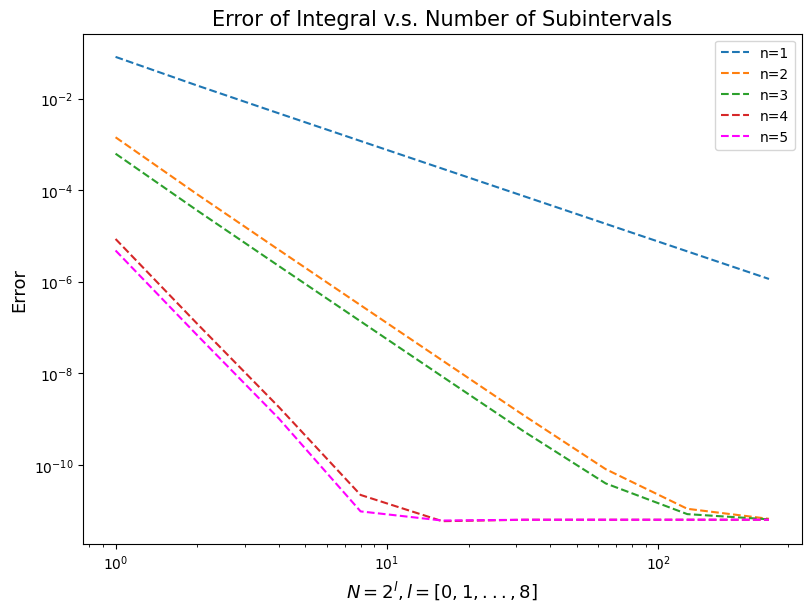

In [ ]:
xVals = np.linspace(0, 1, 100)
ySine = sine2(xVals)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

errors = []

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        error = abs(0.2726756433 - numInt)

        errors.append(error)

        # print(f'N={N}, n={n}, Error={error}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns))).T

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'magenta']

for i in range(len(ns)):
    plt.loglog(Ns, matrix[i], label=f'n={i+1}', c=colors[i], linestyle='dashed')


plt.xlabel(f'$N = 2^l, l=[0,1,...,8]$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Error of Integral v.s. Number of Subintervals',
          fontsize=15)
plt.legend()

plt.show()


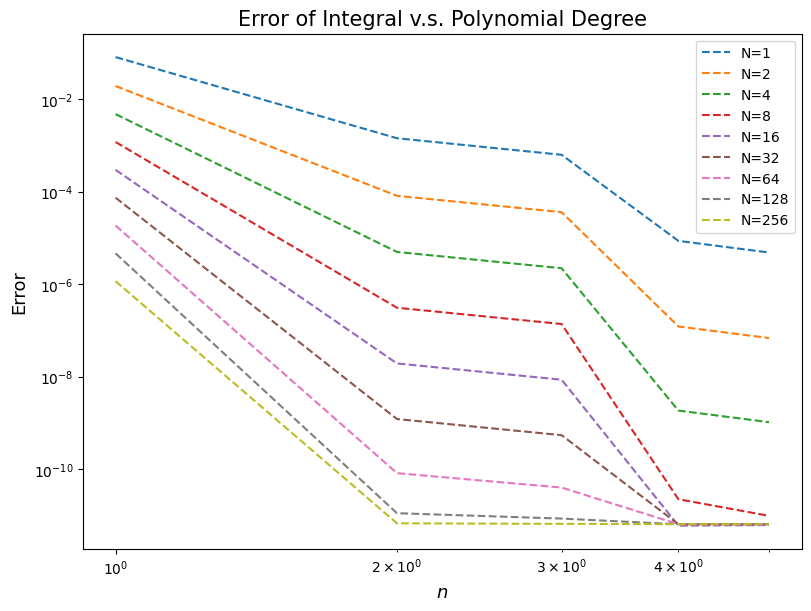

In [ ]:
ns = range(1,6)
Ns = [2**i for i in range(0,9)]

fig = plt.figure(figsize=(8,6), constrained_layout=True)

errors = []

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        error = abs(0.2726756433 - numInt)

        errors.append(error)

        # print(f'N={N}, n={n}, Error={error}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns)))
# print(matrix)


for i in range(len(Ns)):
    plt.loglog(ns, matrix[i], label=f'N={Ns[i]}', linestyle='dashed')

plt.xlabel(f'$n$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Error of Integral v.s. Polynomial Degree',
          fontsize=15)
plt.legend()

plt.show()

We can see that for N=256 the degree of exactness is n = 2, for N = 128,64,32,16 the degree of exactness is n = 4, and for the others is higher.

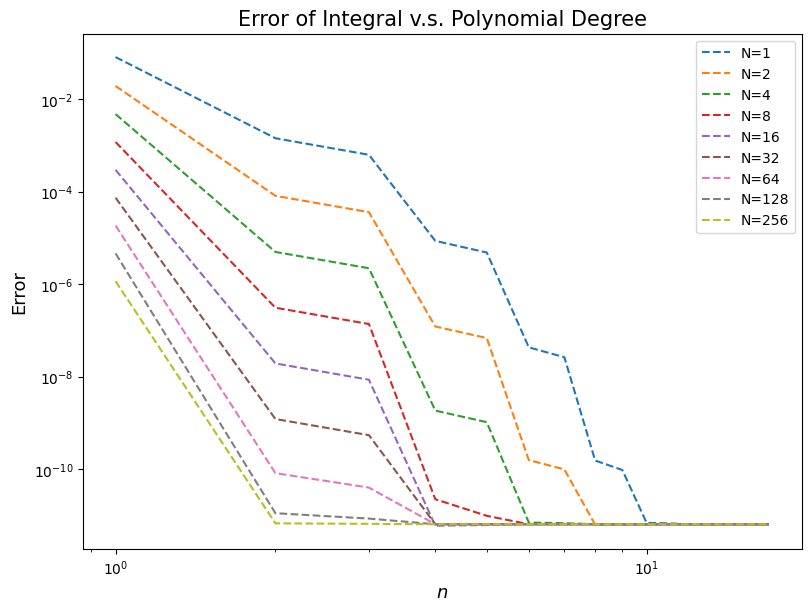

In [ ]:
ns = range(1,18)
Ns = [2**i for i in range(0,9)]

fig = plt.figure(figsize=(8,6), constrained_layout=True)

errors = []

for N in Ns:
    for n in ns:
        numInt = compositeIntegr(sine2, interval, n, N)

        error = abs(0.2726756433 - numInt)

        errors.append(error)

        # print(f'N={N}, n={n}, Error={error}')


matrix = np.reshape(np.array(errors), (len(Ns), len(ns)))
# print(matrix)


for i in range(len(Ns)):
    plt.loglog(ns, matrix[i], label=f'N={Ns[i]}', linestyle='dashed')

plt.xlabel(f'$n$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Error of Integral v.s. Polynomial Degree',
          fontsize=15)
plt.legend()

plt.show()


Here we can see the other Ns.

1.   List item
2.   List item


N = 8 the degree of exactness n = 6, when N = 4 -> n = 8, N = 2 -> n = 8, N = 1 -> n ~ 10